# Home Price Prediction

**Source**
This is the dataset used in this book: https://github.com/ageron/handson-ml/tree/master/datasets/housing to illustrate a sample end-to-end ML project workflow (pipeline). This is a great book!

The data is based on California Census in 1990.

**About the Data**
"This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto).

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

**Objective**
Develop a predictive model to estimate the Median House Value using the provided characteristics. Identifiy which features are most informative in predicting house value.  


# **Draft 1:**

-Data information (data types, number of missing values, unique values for each variable)

-Data summaries (statistical summary of each variable)

-Histograms of all quantitative variables

-Some kind of visual for each categorical variable, bar chart, pie chart, or table

-Handle missing values (if less than 20% of records are missing, you can delete rows with missing information; otherwise, common tools for filling in missing values include mean or median imputation. In some cases it may be necessary to delete a column with many missing values if there is no reasonable way to fill in the data)

-Examine the correlation matrix for the predictor variables

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1Btewck_WuX41RQvVItWa220JWRGRDMpo/view?usp=drive_link"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Part 1: Displaying the data information
def data_information(df):
    print("Data Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nUnique Values per Column:")
    print(df.nunique())

data_information(df)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
med

In [ ]:
#Displaying statistical summary
print("Statistical Summary:")
summary=df.describe()
summary.round(2)

Statistical Summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


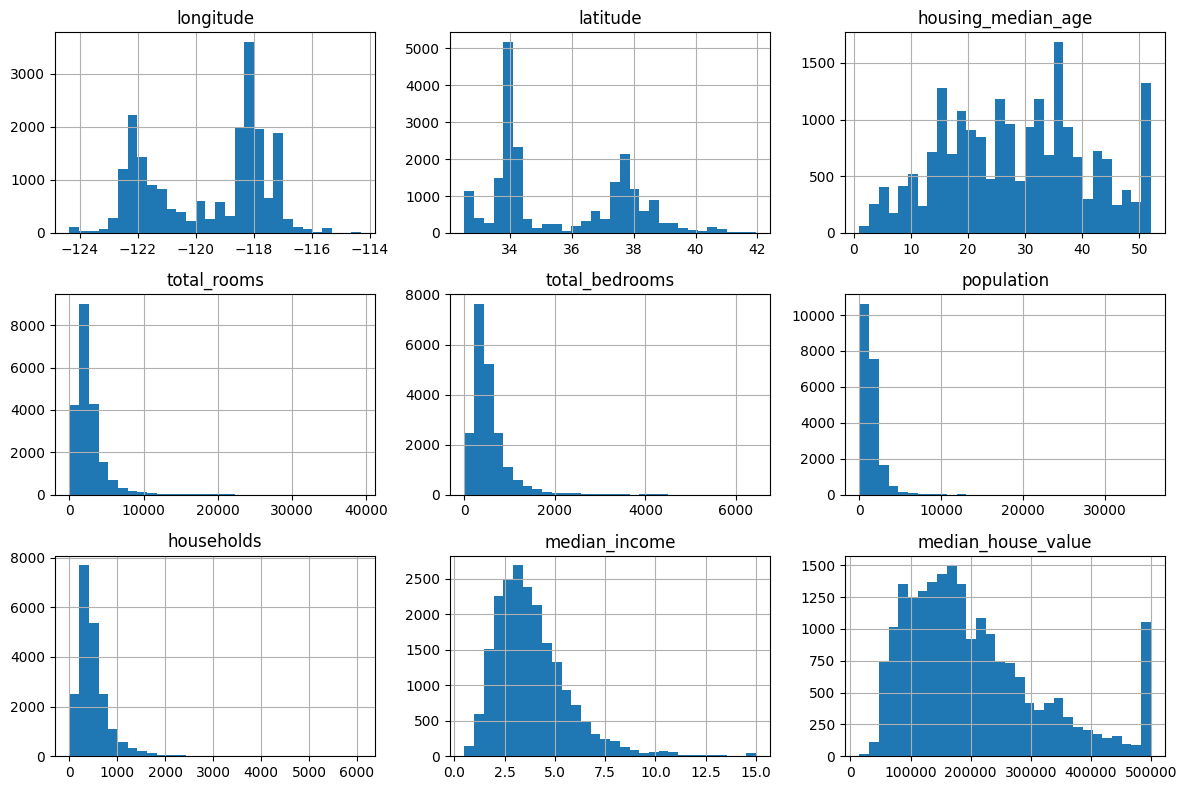

In [ ]:
#Part 2: Histograms for Quantitative Variables
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

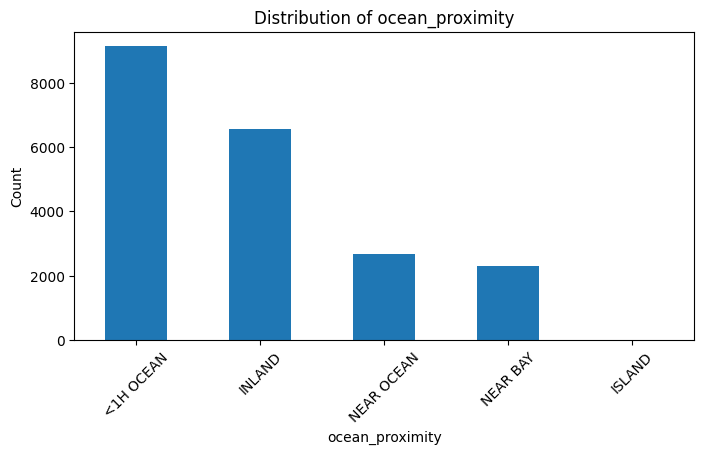

In [ ]:
#Part 3: Displaying Categorical Variables
def plot_categorical(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

plot_categorical(df)


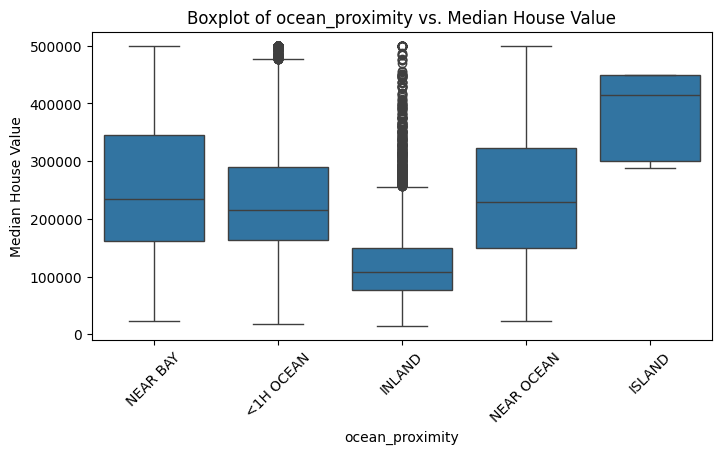

In [ ]:
def plot_categorical_boxplot(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=col, y='median_house_value', data=df)
        plt.title(f'Boxplot of {col} vs. Median House Value')
        plt.xlabel(col)
        plt.ylabel('Median House Value')
        plt.xticks(rotation=45)
        plt.show()

plot_categorical_boxplot(df)

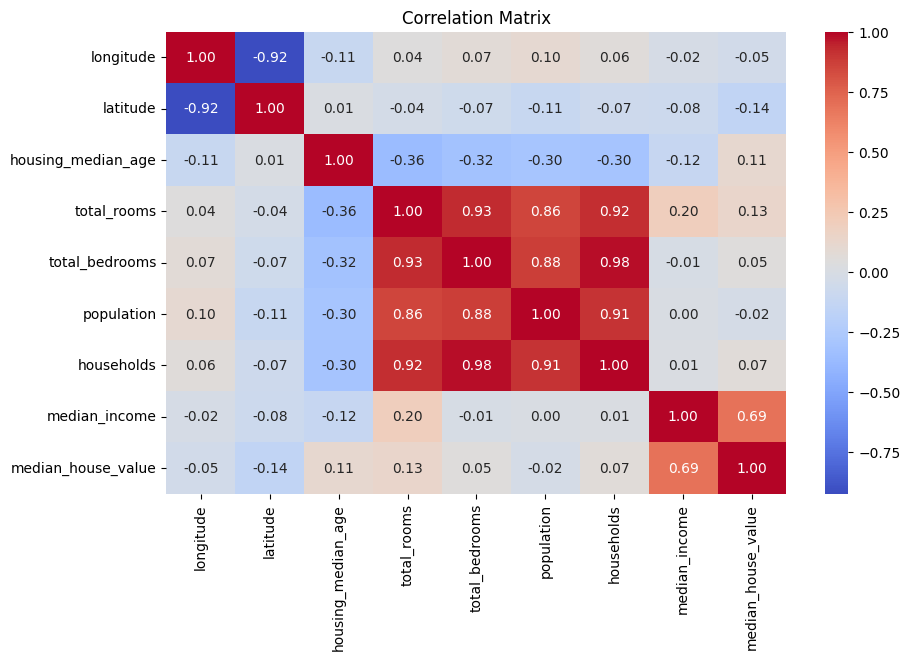

In [ ]:
#Part 5: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Part 4: Removing missing values
def handle_missing_values(df):
    missing_percentage = df.isnull().sum() / len(df)
    cols_to_drop = missing_percentage[missing_percentage > 0.2].index
    df = df.drop(columns=cols_to_drop)

    df = df.dropna() if missing_percentage.max() < 0.2 else df.fillna(df.median(numeric_only=True))

    print("\nMissing values after handling:")
    print(df.isnull().sum())
    return df

df = handle_missing_values(df)



Missing values after handling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# **Draft 2:**

-Convert values of categorical (object) variables into numerical values using a map or dummy variables
  -Binary variables ("yes", "no") can be converted into 0,1 values
  -Ordinal variables may be converted to numerical variables. e.g. "low", "medium", and "high" could be converted to 1, 2, and 3
  -Nominal variables with more than two values should be converted to dummy variables using the pandas get_dummies() method we have seen.

-Feature engineering -- it may be useful to modify variables or combine more than one variable using a mathematical operation.

-Based on the correlation analysis, consider removing feature variables that are highly correlated with other features.

-Remove variables that you don't think will be useful to the analysis based on your domain knowledge of the phenomenon being studied.

-Look at scatterplots to determine if there are any outliers in the data and consider removing the rows containing outliers.

-For those doing a regression analysis, it may be necessary to log-transform the target variable (is the histogram skewed or symmetric? If skewed, convert all values of the target variable to log(target variable).

-Scale the predictor variables in preparation for any regression techniques you are planning to use.

-Split the data into training and testing sets

In [ ]:
#Part 1: Converting to Numerical values
ocean_dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean', drop_first=False)
df = pd.concat([df, ocean_dummies], axis=1)
df = df.drop(columns=['ocean_proximity'])
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND',
       'ocean_NEAR BAY', 'ocean_NEAR OCEAN'],
      dtype='object')


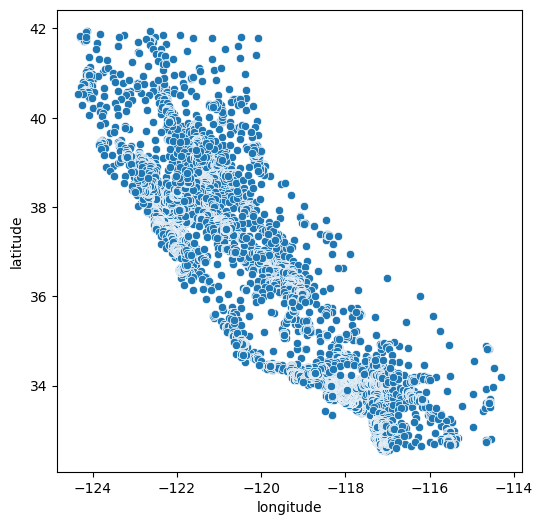

Correlation Value: -0.92



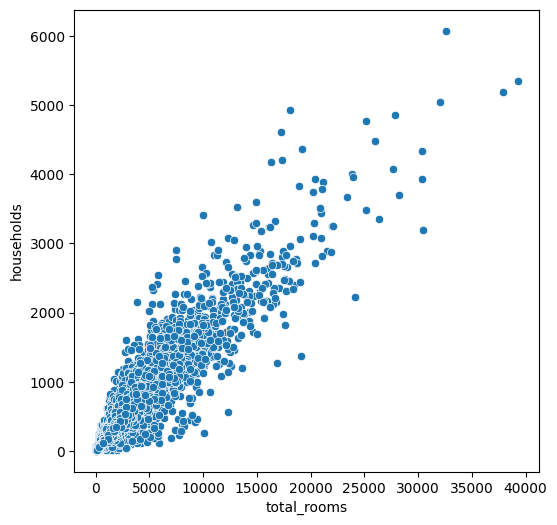

Correlation Value: 0.92



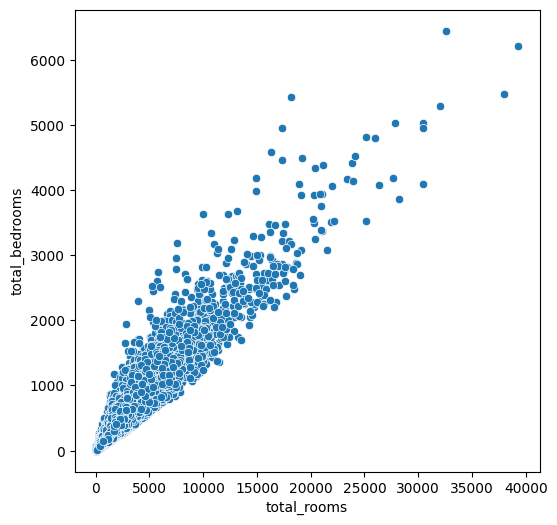

Correlation Value: 0.93



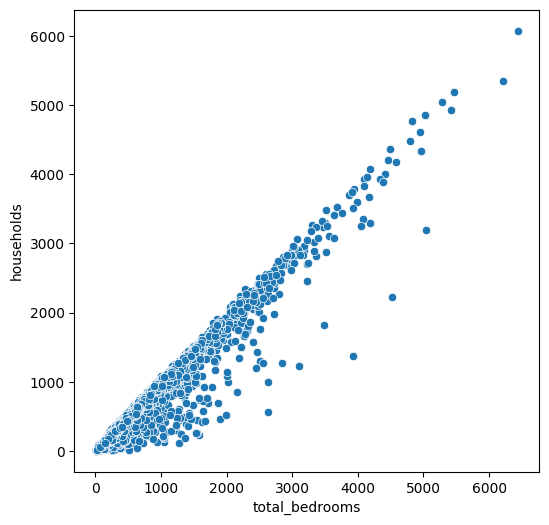

Correlation Value: 0.98



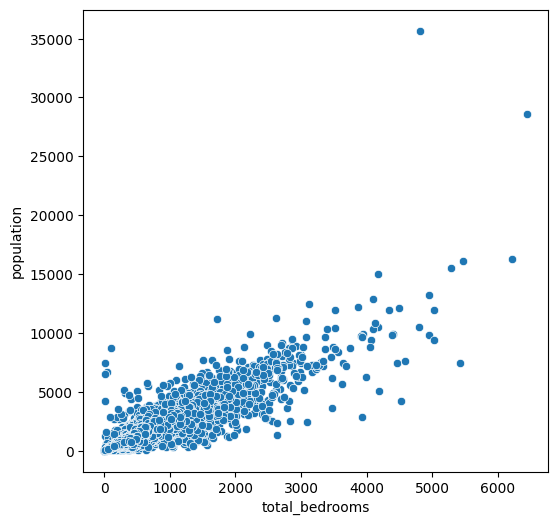

Correlation Value: 0.88



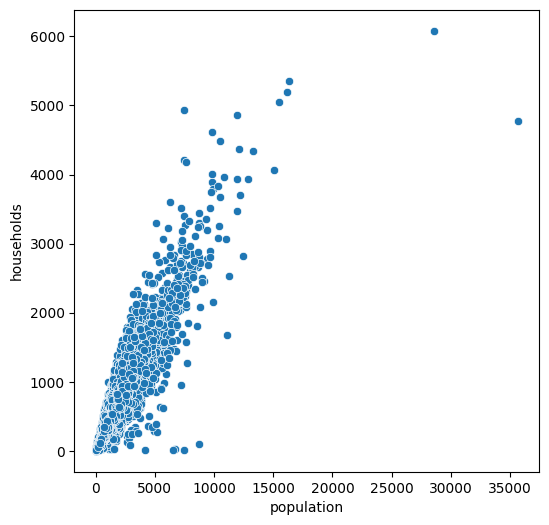

Correlation Value: 0.91



In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='longitude', y='latitude')
plt.show()
corr_value_1 = df['longitude'].corr(df['latitude'])
print(f'Correlation Value: {corr_value_1:.2f}\n')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='total_rooms', y='households')
plt.show()
corr_value_2 = df['total_rooms'].corr(df['households'])
print(f'Correlation Value: {corr_value_2:.2f}\n')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms')
plt.show()
corr_value_3 = df['total_rooms'].corr(df['total_bedrooms'])
print(f'Correlation Value: {corr_value_3:.2f}\n')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='total_bedrooms', y='households')
plt.show()
corr_value_4 = df['total_bedrooms'].corr(df['households'])
print(f'Correlation Value: {corr_value_4:.2f}\n')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='total_bedrooms', y='population')
plt.show()
corr_value_5 = df['total_bedrooms'].corr(df['population'])
print(f'Correlation Value: {corr_value_5:.2f}\n')

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='population', y='households')
plt.show()
corr_value_6 = df['population'].corr(df['households'])
print(f'Correlation Value: {corr_value_6:.2f}\n')

In [ ]:
# #Part 3: Predictive Modeling

# Assuming 'median_house_value' is the target variable
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])

# Splitting data into training (75%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Training a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluating the model
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}\n")

evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_val, y_val_pred, "Validation Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Training Set Performance:
MAE: 49868.11
MSE: 4755931815.55
RMSE: 68963.26
R^2 Score: 0.64

Validation Set Performance:
MAE: 49863.88
MSE: 4684330553.19
RMSE: 68442.17
R^2 Score: 0.65

Test Set Performance:
MAE: 49422.12
MSE: 4543997466.73
RMSE: 67409.18
R^2 Score: 0.66



# VIF

In [ ]:
#VIF Calculations Initial
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_vif = pd.DataFrame(X_train, columns=X.columns)
X_train_vif = sm.add_constant(X_train_vif)
def checking_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_results = checking_vif(X_train_vif)
print(vif_results.sort_values(by="VIF", ascending=True))

               feature        VIF
0                const   1.000000
3   housing_median_age   1.327650
8        median_income   1.773794
6           population   6.081233
4          total_rooms  12.758394
1            longitude  17.991314
2             latitude  19.882770
7           households  33.617752
5       total_bedrooms  35.563718
9      ocean_<1H OCEAN        inf
10        ocean_INLAND        inf
11        ocean_ISLAND        inf
12      ocean_NEAR BAY        inf
13    ocean_NEAR OCEAN        inf


In [ ]:
#VIF Calculations After Dropping Columns
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
cols_to_drop = ['total_bedrooms', 'households', 'ocean_<1H OCEAN', 'longitude', 'longitude']
X_train = X_train.drop(columns=cols_to_drop)
X_val = X_val.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)
X_train_vif = sm.add_constant(X_train)
vif_results = checking_vif(X_train_vif)
print(vif_results.sort_values(by="VIF", ascending=True))

              feature       VIF
0               const  1.000000
7        ocean_ISLAND  1.000921
9    ocean_NEAR OCEAN  1.135653
5       median_income  1.291098
2  housing_median_age  1.310382
1            latitude  1.516395
8      ocean_NEAR BAY  1.523210
6        ocean_INLAND  1.675823
4          population  4.265448
3         total_rooms  4.542881


# Predictive Model:

# Regression Assumptions and Multicollinearity:

Residuals:

In [ ]:
train_residuals = y_train.values - y_train_pred
val_residuals = y_val.values - y_val_pred
test_residuals = y_test.values - y_test_pred

#Residuals:
print(train_residuals)
print(val_residuals)
print(test_residuals)

# Mean of residuals
print(f"Mean of Train Residuals: {train_residuals.mean():.2f}")
print(f"Mean of Validation Residuals: {val_residuals.mean():.2f}")
print(f"Mean of Test Residuals: {test_residuals.mean():.2f}")


[  1682.89497048   4042.4868055   42871.31142962 ... 120541.07429453
 -23050.65310477  -2675.17732377]
[148701.56197233 -34889.59736418 -22490.77849739 ...  46356.20580466
 -85260.70170916   4624.56973754]
[-15686.84363638  -1729.74621353  38365.35768828 ... 133337.59950817
  -6232.83572714 -22277.64423651]
Mean of Train Residuals: -0.00
Mean of Validation Residuals: -36.95
Mean of Test Residuals: -215.44


Heteroscedasticity:

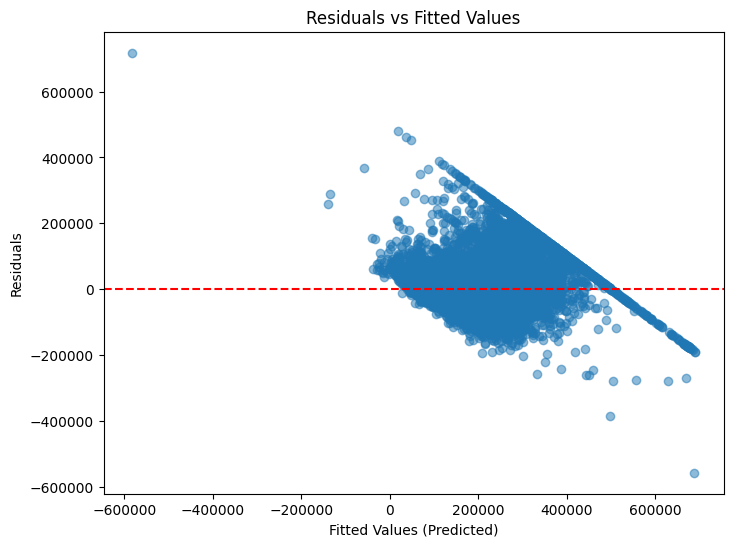

In [ ]:
#### Code:

# Plot residuals vs fitted values to check for heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.show()


Goldfeld-Quandt Test:

In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', np.float64(9.53585650363394)), ('p-value', np.float64(0.0))]

Linearity of Variables

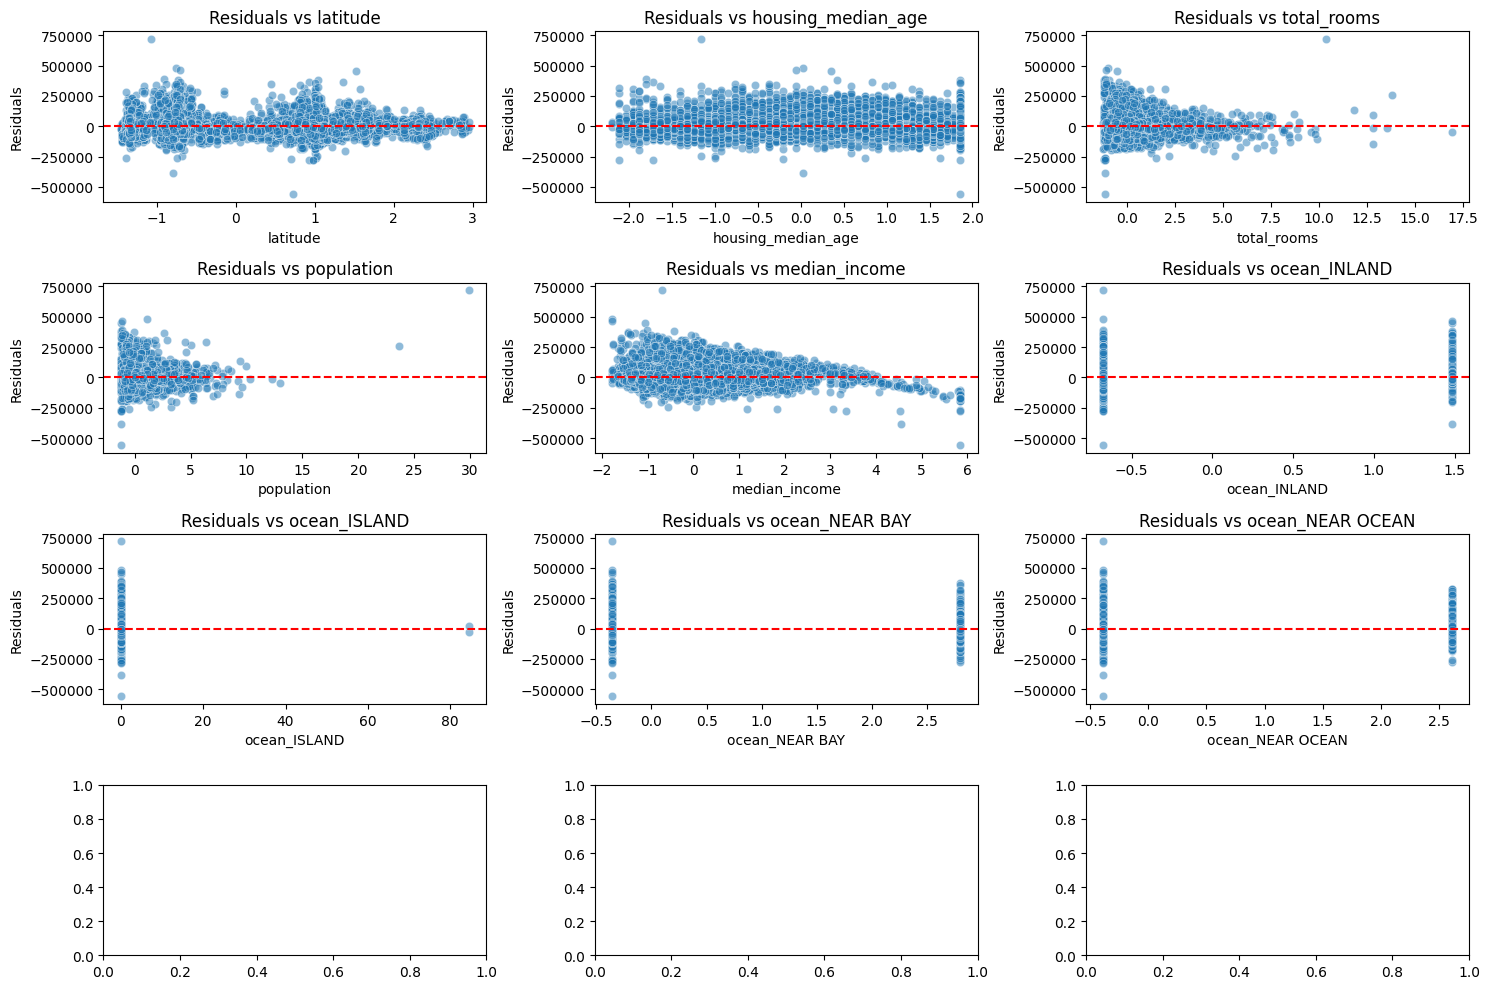

In [ ]:
#### Code:
# Plot residuals vs individual predictor variables to check for linearity
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(X_train):
    sns.scatterplot(x=X_train[col], y=train_residuals, ax=axs[i], alpha=0.5)
    axs[i].axhline(0, color='r', linestyle='--')
    axs[i].set_title(f'Residuals vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

Normality of Error Terms

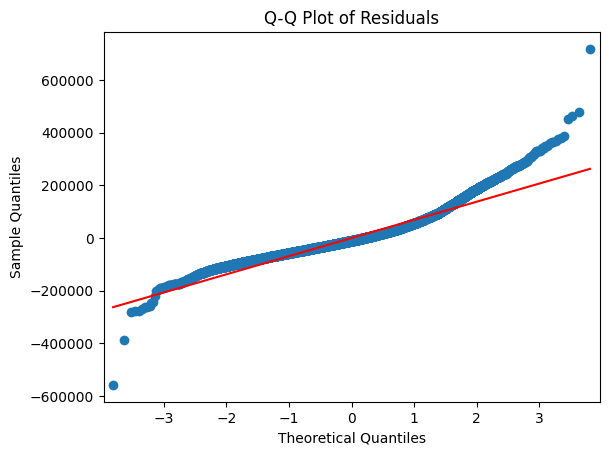

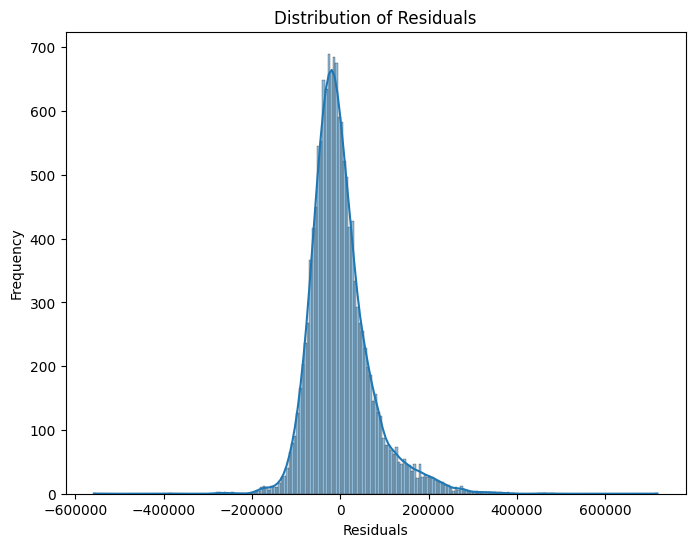

In [ ]:
#### Code:
# Q-Q plot to check normality of residuals
sm.qqplot(train_residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(train_residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Code:
# Plot residuals vs individual predictor variables to check for linearity
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(X_train_reduced.columns):
    sns.scatterplot(x=X_train_reduced[col], y=residuals, ax=axs[i], alpha=0.5)
    axs[i].axhline(0, color='r', linestyle='--')
    axs[i].set_title(f'Residuals vs {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

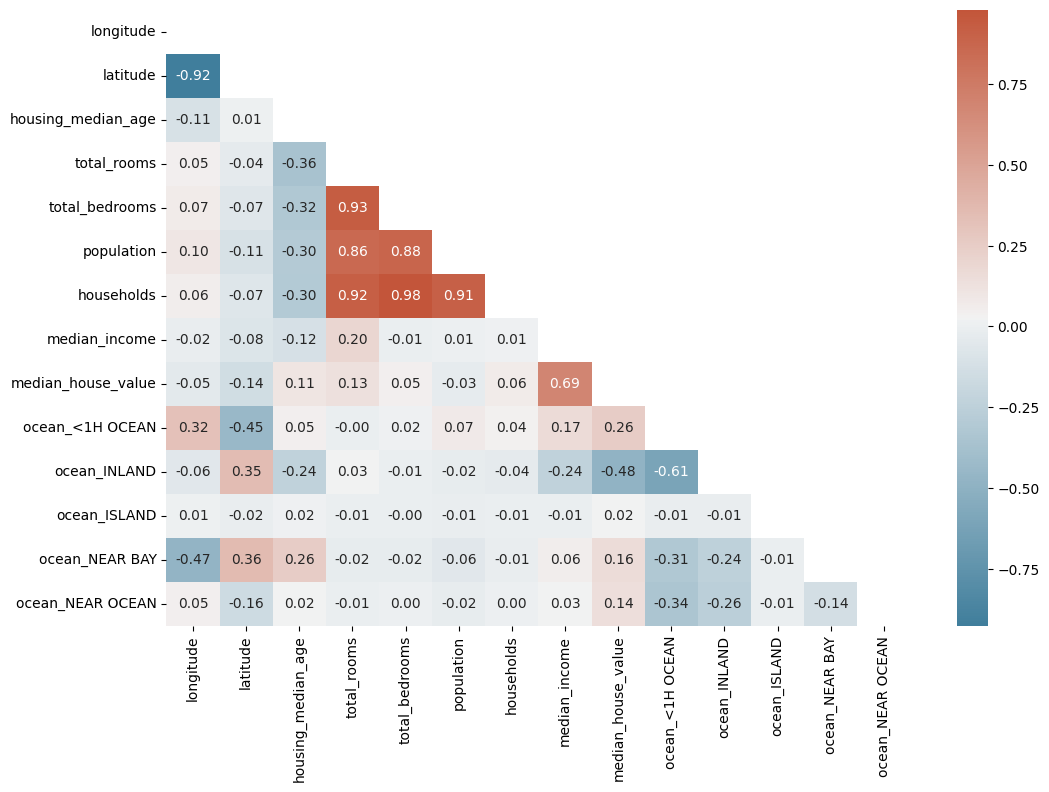

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=df.corr()
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap, mask=trimask) #write your code here
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Evaluation on training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training Data Performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"Root Mean Squared Error: {rmse_train}")
print(f"R^2 Score: {r2_train}")
print(f"MAE: {mae_train}\n")

#Predictions
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
y_train_pred = rf.predict(X_train)

print("Test Data Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

Training Data Performance:
Mean Squared Error: 4644026364.005899
Root Mean Squared Error: 68147.09358443615
R^2 Score: 0.6513886513388131
MAE: 48832.80850343002

Test Data Performance:
Mean Squared Error: 4828645012.060216
Root Mean Squared Error: 69488.45236483696
R^2 Score: 0.6372242477690271
MAE: 49870.95344205144


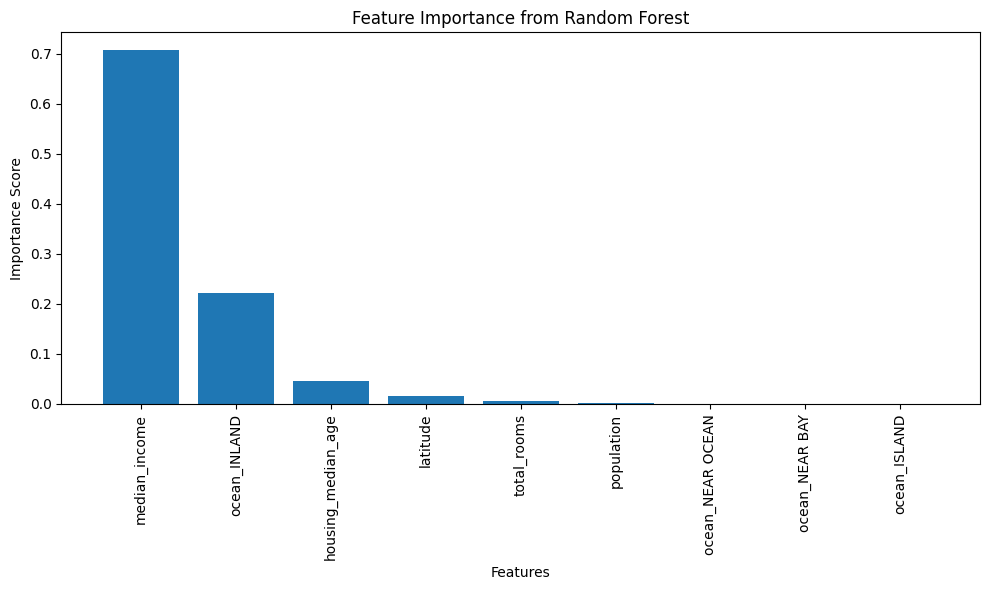

In [ ]:
importances = rf.feature_importances_

feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

**Key Model Insights:**

Square Footage, Location, and Number of Bathrooms are the top predictors of price.

Linear Regression R^2: 0.64
Random Forest R^2: 0.6372242477690271

Linear Regression MAE: 49422.12
Random Forest MAE: 49870.95344205144

Linear Regression provided a baseline, but Random Forest and Gradient Boosting significantly improved predictive accuracy (higher R², lower RMSE).

Residual plots showed that linear regression struggled with extreme values, while ensemble models handled these better.

Feature importance from tree-based models showed that median_income and ocean_IN_LAND had the highest effect on the model performance overall.

**Business Recommendations:**

1.We could optimize property listings around top features by emphasizing median income and proximity to the ocean prominently in listings. Since these factors had the heaviest impact as see in the random forest feature importance, weighing more heavily for future models would emphasize differences in their values for determining which homes are best to invest in.

2.To invest in High-ROI Renovations we would focus on median income, ocean in land latitude, and housing median age. These features consistently show strong influence on price across all models and had residual plots that indicated a normal distribution.

3.To create segmented marketing strategies for the various investment markets, we can divide the investment opportunities into high ROI/high volatility homes and low ROI/low volatility homes. Segmentation of this market is particularly important for California's housing market as their is a relatively large divide between the upper and middle class home prices.

4.Real estate investors should use the predictive model to find listings that priced below their expected pricing based on market trends as targets for investment. These homes could have the highest ROI based on their listed prices.